<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Gathering" data-toc-modified-id="Data-Gathering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Gathering</a></span></li><li><span><a href="#Data-Assessment" data-toc-modified-id="Data-Assessment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Assessment</a></span><ul class="toc-item"><li><span><a href="#Visual-assessment" data-toc-modified-id="Visual-assessment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visual assessment</a></span></li><li><span><a href="#Programmatic-assessment" data-toc-modified-id="Programmatic-assessment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Programmatic assessment</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Storing,-Analyzing,-and-Visualizing-Data" data-toc-modified-id="Storing,-Analyzing,-and-Visualizing-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Storing, Analyzing, and Visualizing Data</a></span><ul class="toc-item"><li><span><a href="#Store-Data" data-toc-modified-id="Store-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Store Data</a></span></li><li><span><a href="#Analyzing,-and-Visualizing-Data" data-toc-modified-id="Analyzing,-and-Visualizing-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analyzing, and Visualizing Data</a></span><ul class="toc-item"><li><span><a href="#insight-one-and-visualization" data-toc-modified-id="insight-one-and-visualization-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>insight one and visualization</a></span></li><li><span><a href="#Insight-two-&amp;-visualization" data-toc-modified-id="Insight-two-&amp;-visualization-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Insight two &amp; visualization</a></span></li></ul></li><li><span><a href="#Insight-three-and-visualization" data-toc-modified-id="Insight-three-and-visualization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Insight three and visualization</a></span></li></ul></li></ul></div>

In [1]:
# Import the libraries that we will need in this project
import pandas as pd
import datetime
import datetime as dt
import numpy as np
import requests
import tweepy
import configparser
import json
import re
import time
from nltk import pos_tag
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe called archive_df
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# Quick check to the file content and structure
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
archive_df.shape

(2356, 17)

The file twitter-archive-enhanced.csv successfully stored in archive data frame, it has 17 columns and 2356 entries

In [4]:
# Using Requests library, download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'image_df'
image_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_df.shape

(2075, 12)

The file image-predictions.tsv successfully downloaded and stored in images data frame, it has 12 columns and 2075 entries

In [6]:
# Query Twitter API for each tweet in the archive_df and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key=''
consumer_secret=''
access_token=''
access_secret=''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True) # Automatically wait for rate limits to replenish
                 



In [7]:
# List where you will store the dictionaries of the results
df_list = []
# List frame where you will store the tweet_id of the errors
error_list = []

# Calculate the time of excution
start = time.time()

# Get the tweet object for all the teweets in archive_df dataframe 
for tweet_id in archive_df['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        # Print one page to look at the structure of the returned file and the names of attributes
        # print(json.dumps(page, indent = 4))
        
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets = page['retweet_count'] # Count of the retweet
        user_followers = page['user']['followers_count'] # How many followers the user had
        user_favourites = page['user']['favourites_count'] # How many favorites the user had
        date_time = page['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    # Catch the exceptions of the TweepError
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)


888202515573088257 _ 404 Not Found
144 - No status found with that ID.
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
144 - No status found with that ID.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
851861385021730816 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
844704788403113984 _ 404 Not Found
144 - No status found with that ID.
842892208864923648 _ 404 Not Found
144 - No status found with that ID.
837366

Rate limit reached. Sleeping for: 117


754011816964026368 _ 404 Not Found
144 - No status found with that ID.
680055455951884288 _ 404 Not Found
144 - No status found with that ID.


Rate limit reached. Sleeping for: 88


In [8]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error_list))

The lengh of the result 2327
The lengh of the errors 29


In [9]:
#  repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        user_followers = page['user']['followers_count']
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [10]:
# We can see that now the 30 errors saved in the list
# lengh of the result
print("The lengh of the result after Querying the errors separately", len(df_list))

The lengh of the result after Querying the errors separately 2356


In [11]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])


In [12]:
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [13]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33695,6976,9348497,147245,2017-08-01 16:23:56+00:00
1,892177421306343426,29230,5280,9348497,147245,2017-08-01 00:17:27+00:00
2,891815181378084864,21974,3466,9347629,147243,2017-07-31 00:18:03+00:00
3,891689557279858688,36778,7190,9347629,147243,2017-07-30 15:58:51+00:00
4,891327558926688256,35164,7723,9348497,147245,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2351,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00
2352,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00
2353,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00
2354,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00


In [14]:
json_tweets.shape

(2356, 6)

- The file tweet_json.txt successfully saved in our working directory.
- contains the result of the API Querying then stored in json_tweets data frame. 
- it has 6 columns and 2356 entries


## Data Assessment

### Visual assessment
Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [15]:
# Asssess maually Archive_df
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
#Assess manually
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
#Assess manually
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33695,6976,9348497,147245,2017-08-01 16:23:56+00:00
1,892177421306343426,29230,5280,9348497,147245,2017-08-01 00:17:27+00:00
2,891815181378084864,21974,3466,9347629,147243,2017-07-31 00:18:03+00:00
3,891689557279858688,36778,7190,9347629,147243,2017-07-30 15:58:51+00:00
4,891327558926688256,35164,7723,9348497,147245,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2351,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00
2352,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00
2353,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00
2354,666020888022790149,2283,420,9347692,147241,2015-11-15 22:32:08+00:00


### Programmatic assessment
Pandas' functions and/or methods are used to assess the data.

In [18]:
print(archive_df['tweet_id'].duplicated().sum())

0


In [19]:
print(archive_df.loc[archive_df.rating_numerator == 204, 'text']) 
print(archive_df.loc[archive_df.rating_numerator == 143, 'text']) 
print(archive_df.loc[archive_df.rating_numerator == 666, 'text']) 
print(archive_df.loc[archive_df.rating_numerator == 1176, 'text'])
print(archive_df.loc[archive_df.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [20]:
#print whole text in order to verify numerators and denominators
print(archive_df['text'][1120]) #17 dogs
print(archive_df['text'][1634]) #13 dogs
print(archive_df['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(archive_df['text'][189]) #no picture, this will be ignored when cleaning data
print(archive_df['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [21]:
print(archive_df.rating_denominator.value_counts())

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


In [22]:
print(archive_df.loc[archive_df.rating_denominator == 11, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 2, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 16, 'text']) 
print(archive_df.loc[archive_df.rating_denominator == 15, 'text'])
print(archive_df.loc[archive_df.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [23]:
print(archive_df['text'][784]) # retweet - will be deleted when deleting all retweets
print(archive_df['text'][1068]) # actual rating 14/10 need to be changed manually
print(archive_df['text'][1662]) #actual rating 10/10 need to be changed manually
print(archive_df['text'][2335]) #actual rating 9/10 need to be changed manually
print(archive_df['text'][1663]) # tweet to explain rating
print(archive_df['text'][342]) #no rating - delete
print(archive_df['text'][516]) #no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [24]:
image_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1743,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,1,malinois,0.332897,True,Chihuahua,0.104116,True,Staffordshire_bullterrier,0.047745,True
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
778,689877686181715968,https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg,1,Old_English_sheepdog,0.269155,True,Tibetan_terrier,0.111496,True,Lakeland_terrier,0.104939,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire_terrier,0.907990,True,silky_terrier,0.076883,True,Australian_terrier,0.008473,True


In [25]:
# checking null values
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# Duplicated values
image_df.duplicated().sum()

0

In [27]:
image_df['jpg_url'].value_counts()


https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [28]:
image_df[image_df['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [29]:
print(image_df.p1_dog.value_counts())
print(image_df.p2_dog.value_counts())
print(image_df.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [30]:
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
json_tweets.sample(20)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1670,681193455364796417,3403,1329,9348548,147245,2015-12-27 19:22:30+00:00
1264,708109389455101952,1799,501,9347668,147241,2016-03-11 01:56:49+00:00
15,889278841981685760,22012,4425,9348497,147245,2017-07-24 00:19:32+00:00
133,865359393868664832,23517,4273,9348498,147245,2017-05-19 00:12:11+00:00
431,819004803107983360,82371,34443,9347640,147241,2017-01-11 02:15:36+00:00
1066,736736130620620800,3868,1538,9347660,147241,2016-05-29 01:49:16+00:00
361,827933404142436356,18796,4814,9347639,147241,2017-02-04 17:34:40+00:00
459,815990720817401858,4677,942,9348510,147245,2017-01-02 18:38:42+00:00
1674,680934982542561280,1908,391,9348548,147245,2015-12-27 02:15:25+00:00
76,877736472329191424,68969,15740,9348497,147245,2017-06-22 03:54:17+00:00


In [32]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2356 non-null   int64 
 1   favorites        2356 non-null   int64 
 2   retweets         2356 non-null   int64 
 3   user_followers   2356 non-null   int64 
 4   user_favourites  2356 non-null   int64 
 5   date_time        2356 non-null   object
dtypes: int64(5), object(1)
memory usage: 110.6+ KB


In [33]:
json_tweets['tweet_id'].value_counts()

666020888022790149    30
688828561667567616     1
687460506001633280     1
687399393394311168     1
687317306314240000     1
                      ..
772877495989305348     1
772826264096874500     1
772615324260794368     1
772581559778025472     1
717841801130979328     1
Name: tweet_id, Length: 2327, dtype: int64

In [34]:
json_tweets['user_followers'].value_counts()

9347690    92
9348558    91
9348536    86
9347648    81
9348516    80
           ..
9347661     2
9348517     2
9348530     2
9348500     1
9348518     1
Name: user_followers, Length: 126, dtype: int64

 Quality

- Completeness, validity, accuracy, consistency (content issues)

 archive_df dataset

- Keep original ratings (no retweets) that have images

- Delete columns that won't be used for analysis

- Erroneous datatypes (doggo, floofer, pupper and puppo columns)

- Separate timestamp into day - month - year (3 columns)

- Correct numerators with decimals

- Correc denominators other than 10:

- Manually (few examples assessed by individual print text).

- Programatically (Tweets with denominator not equal to 10 are usually multiple dogs).



image_df dataset

- Drop 66 jpg_url duplicated
- Create 1 column for image prediction and 1 column for confidence level
- Delete columns that won't be used for analysis

json_tweeets dataset

- Remove duplicates

Tidiness

- Change tweet_id to type int64 in order to merge with the other 2 tables

- All tables should be part of one dataset

## Data Cleaning

In [35]:
archive_df_clean = archive_df.copy() #make a copy of the archive_df
image_df_clean = image_df.copy() #copy of image_df
json_tweets_clean = json_tweets.copy() #copy of json_tweets

1. Archive_df - keep original ratings (no retweets) that have images.

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge twitter_archive and image_prediction, I will only keep the ones with images.

In [36]:
# CODE: Delete retweets by filtering the NaN values of retweeted_status_user_id
archive_df_clean = archive_df_clean[pd.isnull(archive_df_clean['retweeted_status_user_id'])]

In [37]:
#TEST
print(archive_df_clean.retweeted_status_user_id.value_counts().sum())

0


2. Archive_df - Delete columns that won't be used for analysis

In [38]:
#get the column names of archive_df_clean
print(list(archive_df_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [39]:
#CODE: Delete columns no needed
archive_df_clean = archive_df_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], axis=1)

In [40]:
#TEST
print(list(archive_df_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


3. Archive_df - Erroneous datatypes (doggo, floofer, pupper and puppo columns)

- Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column.
- Drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

In [41]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
archive_df_clean = pd.melt(archive_df_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

#CODE: drop dogs
archive_df_clean = archive_df_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
archive_df_clean = archive_df_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')



/tmp/ipykernel_26153/1739045327.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  archive_df_clean = archive_df_clean.drop('dogs', 1)


In [42]:
#TEST
archive_df_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

4. Archive_df - Separate timestamp into day - month - year (3 columns)

- Convert timestamp to datetime. 
- Extract year, month and day to new columns. 
- Finally drop timestamp column.

In [43]:
#CODE: convert timestamp to datetime
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])

#extract year, month and day to new columns
archive_df_clean['year'] = archive_df_clean['timestamp'].dt.year
archive_df_clean['month'] = archive_df_clean['timestamp'].dt.month
archive_df_clean['day'] = archive_df_clean['timestamp'].dt.day

#Finally drop timestamp column
archive_df_clean = archive_df_clean.drop('timestamp', 1)

/tmp/ipykernel_26153/1952930756.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  archive_df_clean = archive_df_clean.drop('timestamp', 1)


In [44]:
#TEST
list(archive_df_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

5. Archive_df - Correct numerators

In [45]:
archive_df_clean[['rating_numerator', 'rating_denominator']] = archive_df_clean[['rating_numerator','rating_denominator']].astype(float)

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          2175 non-null   object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [46]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
archive_df_clean[['rating_numerator', 'rating_denominator']] = archive_df_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

archive_df_clean.loc[(archive_df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_df_clean.loc[(archive_df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_df_clean.loc[(archive_df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_df_clean.loc[(archive_df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_df_clean.loc[(archive_df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [47]:
#TEST
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean[archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/tmp/ipykernel_26153/1824433599.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(archive_df_clean[archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


6. Archive_df - Correct denominators

a. Manually

- Five tweets with denominator not equal to 10 for special circunstances. 
- Update both numerators and denominators when necessary. 
- Delete other five tweets because they do not have actual ratings.

In [48]:
#CODE: Update both numerators and denominators
archive_df_clean.loc[(archive_df_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_df_clean.loc[(archive_df_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

archive_df_clean.loc[(archive_df_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_df_clean.loc[(archive_df_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

archive_df_clean.loc[(archive_df_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_df_clean.loc[(archive_df_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

archive_df_clean.loc[(archive_df_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
archive_df_clean.loc[(archive_df_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

archive_df_clean.loc[(archive_df_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
archive_df_clean.loc[(archive_df_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'] != 832088576586297345]
archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'] != 810984652412424192]
archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'] != 682808988178739200]
archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'] != 835246439529840640]
archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(archive_df_clean[archive_df_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


b. Programatically
- These tweets with denominator not equal to 10 are multiple dogs. 
- For instance, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1.

In [49]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
archive_df_clean['rating'] = 10 * archive_df_clean['rating_numerator'] / archive_df_clean['rating_denominator'].astype(float)

#TEST
archive_df_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
3808,676811746707918848,Say hello to Penny &amp; Gizmo. They are pract...,9.0,10.0,Penny,None,2015,12,15,9.0
3016,746872823977771008,This is a carrot. We only rate dogs. Please on...,11.0,10.0,a,None,2016,6,26,11.0
3891,674742531037511680,Some clarification is required. The dog is sin...,11.0,10.0,None,None,2015,12,10,11.0
3992,672591762242805761,This is Taz. He boxes leaves. 10/10 https://t....,10.0,10.0,Taz,None,2015,12,4,10.0
2087,667517642048163840,This is Dook &amp; Milo. Dook is struggling to...,8.0,10.0,Dook,None,2015,11,20,8.0
5658,693095443459342336,This is Milo. He doesn't understand your fancy...,10.0,10.0,Milo,pupper,2016,1,29,10.0
2281,869772420881756160,"This is Dewey (pronounced ""covfefe""). He's hav...",13.0,10.0,Dewey,None,2017,5,31,13.0
2411,840632337062862849,Say hello to Maddie and Gunner. They are consi...,12.0,10.0,Maddie,None,2017,3,11,12.0
3702,680805554198020098,This guy's dog broke. So sad. 9/10 would still...,9.0,10.0,None,None,2015,12,26,9.0
4032,671729906628341761,I'm just going to leave this one here as well....,13.0,10.0,None,None,2015,12,1,13.0


7. Image_df
- Drop 66 jpg_url duplicates

In [50]:
#CODE: Delete duplicated jpg_url
image_df_clean = image_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
print(image_df_clean['jpg_url'].duplicated().sum())

0


8. Image_df
- Create 1 column for image prediction and 1 column for confidence level

- Create a function where I will keep the first true prediction along the confidence level as new columns.

In [51]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_df_clean):
    if image_df_clean['p1_dog'] == True:
        dog_type.append(image_df_clean['p1'])
        confidence_list.append(image_df_clean['p1_conf'])
    elif image_df_clean['p2_dog'] == True:
        dog_type.append(image_df_clean['p2'])
        confidence_list.append(image_df_clean['p2_conf'])
    elif image_df_clean['p3_dog'] == True:
        dog_type.append(image_df_clean['p3'])
        confidence_list.append(image_df_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_df_clean column.        
image_df_clean.apply(image, axis=1)

#create new columns
image_df_clean['dog_type'] = dog_type
image_df_clean['confidence_list'] = confidence_list

In [52]:
#drop rows that has prediction_list 'error'
image_df_clean = image_df_clean[image_df_clean['dog_type'] != 'Error']

#TEST: 
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


9. Image_df 
- Delete columns that won't be used for analysis

In [53]:
#CODE: print list of image_df columns
print(list(image_df_clean))


['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


In [54]:
#Delete columns
image_df_clean = image_df_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_df_clean)

/tmp/ipykernel_26153/705290477.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  image_df_clean = image_df_clean.drop(['img_num', 'p1',


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

10. json_tweets 
- Remove duplicated values

In [55]:
#CODE:check duplicates
json_tweets_clean.duplicated().sum()

29

In [56]:
#drop duplicates
json_tweets_clean.drop_duplicates(inplace=True)


In [57]:
#Test
json_tweets_clean.duplicated().sum()

0

11. Tidiness 
- Change tweet_id to type int64 in order to merge with the other 2 tables

In [58]:
#CODE: change tweet_id from str to int
json_tweets_clean['tweet_id'] = json_tweets_clean['tweet_id'].astype(int)

#TEST
json_tweets_clean['tweet_id'].dtypes

dtype('int64')

12. Tidiness 
- Merge all tables to one dataset

In [59]:
#CODE: create a new dataframe that merge archive_df_clean and 
#image_df_clean
twitter_df = pd.merge(archive_df_clean, 
                      image_df_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

#TEST
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [60]:
#CODE: create a new dataframe that merge twitter_df and json_tweets_clean
twitter_df1 = pd.merge(twitter_df, json_tweets_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
twitter_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   text                1625 non-null   object 
 2   rating_numerator    1625 non-null   float64
 3   rating_denominator  1625 non-null   float64
 4   name                1625 non-null   object 
 5   dogs_stage          1625 non-null   object 
 6   year                1625 non-null   int64  
 7   month               1625 non-null   int64  
 8   day                 1625 non-null   int64  
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_type            1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  favorites           1618 non-null   float64
 14  retweets            1618 non-null   float64
 15  user_followers      1618 non-null   float64
 16  user_f

## Storing, Analyzing, and Visualizing Data
### Store Data

In [61]:
#Store the clean DataFrame in a CSV file
twitter_df1.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Analyzing, and Visualizing Data
- I joined the data and stored it as twiiter_df1

In this section I will answer the following questions:

- What are most common 5 dogs' names?
- Golden retriever is the most common dog in this dataset.
- The number of female vs male dogs

#### insight one and visualization
most common 5 dogs' names?

In [62]:
#common names
top_names = twitter_df1.name.value_counts().nlargest(7)
top_names

None       404
a           46
Lucy        10
Cooper      10
Charlie     10
Oliver       9
Tucker       8
Name: name, dtype: int64

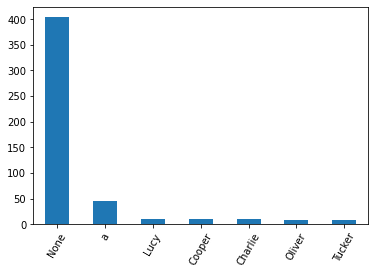

In [63]:
#plot to visualize
top_names.plot(kind='bar')
plt.xticks(rotation=60)
plt.show()


- If we exclude cases, where a letter 'A' is provided, the most popular names are: 
- Lucy, Cooper, Charlie, Oliver, and Tucker.


#### Insight two & visualization
 Golden retriever is the most common dog in this dataset.

In [64]:
twitter_df1['dog_type'].value_counts()

golden_retriever      142
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
standard_schnauzer      1
EntleBucher             1
Japanese_spaniel        1
Scotch_terrier          1
clumber                 1
Name: dog_type, Length: 113, dtype: int64

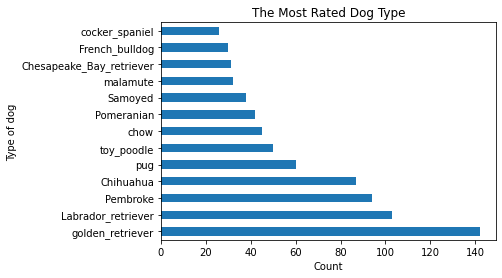

In [66]:
df_dog_type = twitter_df1.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('The Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Insight three and visualization
The number of female vs male dogs

In [72]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in twitter_df1['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
twitter_df1['dog_gender'] = dog_gender

# Test
print("dog_gender count \n", twitter_df1.dog_gender.value_counts())

dog_gender count 
 NaN       898
male      534
female    193
Name: dog_gender, dtype: int64


dog_gender count 
 AxesSubplot(0.125,0.125;0.775x0.755)


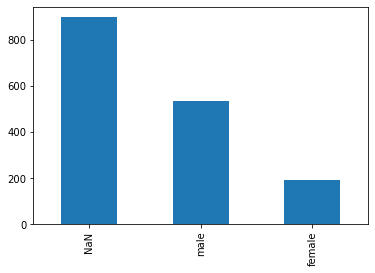

In [76]:
print("dog_gender count \n", twitter_df1.dog_gender.value_counts().plot(kind='bar'))

- There are more male dogs than male dogs